# Import Libraries

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Check Database

In [22]:
data_url =  "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/refs/heads/master/palmerpenguins/data/penguins.csv"
penguins = pd.read_csv(data_url)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Split the Training and testing set

We will do our cross validation on the training set and do a final
evlauation using our testing set.

In [20]:
# Make our X variable, which will include all of the predictor 
# attributes (bill_legnth and body_mass)
# and y will include the target attributes (species)

penguins_no_chinstrap = pd.concat([adelie, gentoo])
penguins_no_chinstrap = penguins_no_chinstrap.dropna()

X = penguins_no_chinstrap.loc[:,["bill_length_mm", "body_mass_g"]]
y = penguins_no_chinstrap.loc[:,"species"]

# Performing Cross Validation and Initalizing Decision Tree Classifier

In [73]:
# Define the range of max_depth values to test
max_depths = range(1, 11)

all_scores = []

for max_depth in max_depths:
    dtc = DecisionTreeClassifier(max_depth=max_depth)
    
    scores = cross_val_score(dtc, X, y, cv=5)
    
    all_scores.append(scores)

# Creating boxplots with the cross validation scores

/var/folders/pn/jtrp7_q14xn6pl419klwdhg00000gn/T/ipykernel_35448/3101006975.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_scores, labels=max_depths)


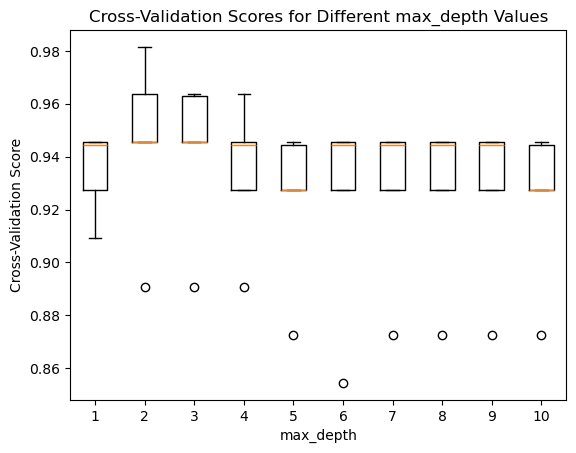

In [74]:
plt.boxplot(all_scores, labels=max_depths)
plt.xlabel('max_depth')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Different max_depth Values')
plt.show()

### According to the boxplots, a `max_depth` of 2 seems to have the best overall score

# Training the Model

In [77]:
mean_scores = [np.mean(scores) for scores in all_scores]
best_score = mean_scores[1] # (2-1 to access array element for depth 2)

print(f"Tthe best max_depth is 2 with a score of {best_score}")

best_dtc = DecisionTreeClassifier(max_depth=best_max_depth)
best_dtc.fit(X, y)

Tthe best max_depth is 2 with a score of 0.9453872053872054


DecisionTreeClassifier(max_depth=2)

# Testing the Model

In [ ]:
test_score = best_dtc.score(X_test, y_test)
print(f"The test score of the model with max_depth {best_max_depth} is: {test_score}")

generalization_error = abs(best_score - test_score)
print(f"The generalization error is: {generalization_error:.3f}")

The test score of the model with max_depth 2 is: 0.9636363636363636
The generalization error is: 0.018
